# Timur Porokhnia
## Klasyfikacja języka migowego

Jako projekt zaliczeniowy obrałem klasyfikacje języka migowego na podstawie zbioru danych z Kaggle [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist?). Zbiór danych składa się z 34627 obrazków o rozdzielczości 28x28 pikseli w skali szarości (wartości od 0 do 255). Obrazki przedstawiają amerykański język migowy i reprezentują 24 klasy (wszystkie litery nie lizcąc J oraz Z, które potrzebują ruchu). Czyli mamy doczynienie z klasyfikacją wiloklasową. Zbiór danych został wstępnie podzielony na dwa zbiory - treningowy oraz testowy o rozmiarach 27455 oraz 7172 odpowiednio.

Obrazki do przygotowania:  
![Colored_data](./img/data.png)

Obrazki po przygotowaniu:
![Grey_data](./img/data_gray.png)

Wskazówka do znaczenia znaków:
![signs](./img/signs.png)

Dla rozwiązania danego problemu zkorzystałem z bibliotek `tensorflow` oraz `keras`

In [1]:
#import keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, InputLayer
from tensorflow.keras import regularizers

plt.style.use("ggplot")

## Wczytanie danych

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

Zobaczmy w jakiej formie są zapisane nasze dane

In [3]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

Jak widać każdy obrazek ma kolumne label, która wskazuje na klase danego obrazku oraz 784 (28x28) kolumn reprezentujące pikseli obrazku.

In [4]:
x_train, y_train = train.iloc[:, 1:].to_numpy(), train.iloc[:,0].to_numpy()
x_test, y_test = test.iloc[:, 1:].to_numpy(), test.iloc[:,0].to_numpy()

##  Wizualizacja danych

Zobaczmy kilka przykładów wraz z ich klasą

In [5]:
n_rows = 4
n_cols = 10
indexes = np.random.randint(0, len(x_train), (n_rows, n_cols))

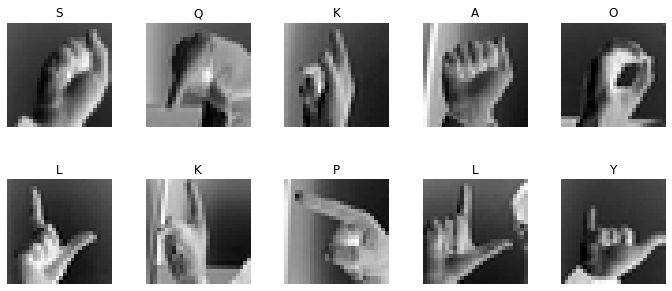

In [6]:
n_rows = 2
n_cols = 5
#indexes = np.arange(n_rows * n_cols).reshape((n_rows, n_cols))
indexes = np.random.randint(0, len(x_train), (n_rows, n_cols))

plt.figure(figsize=(n_cols * 2.4, n_rows * 2.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = indexes[row, col]
        plt.subplot(n_rows, n_cols, n_cols * row + col + 1)
        plt.imshow(x_train[index].reshape((28,28)), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(chr(ord("A") + y_train[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Przygotowanie danych

Dla przygotowania danych użyłem zwykłego podzielienia przez 255 oraz przekształciłem etykiety w forme kategorialną
za pomocą funkcji `keras.utils.to_categorical`. Nie używałem augmentacji dla tego zbioru bo z jego opisu wynika, że już była zrobiona (skalowanie, filtry, przypadkowe pikseli, zmiana jasności oraz kontrastu i trzy stopni powrotu)

In [7]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_train.shape, y_train.shape

((27455, 784), (27455, 25))

In [9]:
#input_shape = (28, 28, 1)
input_shape = (28*28,)
output_shape = 25

## Podejście naiwne - zwykły model NN

In [10]:
model = Sequential([
    Dense(28 * 28, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape),
    Dropout(0.2),
    Dense(28 * 28 // 2, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape),
    Dropout(0.2),
    Dense(output_shape, activation="softmax")
])

model.summary()

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                9825      
Total params: 932,985
Trainable params: 932,985
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_split=0.2, shuffle=True)

Epoch 1/20
687/687 [==============================] - 6s 9ms/step - loss: 2.6292 - accuracy: 0.3083 - val_loss: 1.5863 - val_accuracy: 0.5762
Epoch 2/20
687/687 [==============================] - 5s 8ms/step - loss: 1.4944 - accuracy: 0.5664 - val_loss: 1.0749 - val_accuracy: 0.7237
Epoch 3/20
687/687 [==============================] - 5s 8ms/step - loss: 1.1787 - accuracy: 0.6773 - val_loss: 0.8653 - val_accuracy: 0.7999
Epoch 4/20
687/687 [==============================] - 5s 8ms/step - loss: 0.9919 - accuracy: 0.7427 - val_loss: 0.7209 - val_accuracy: 0.8700
Epoch 5/20
687/687 [==============================] - 6s 9ms/step - loss: 0.9243 - accuracy: 0.7740 - val_loss: 0.7503 - val_accuracy: 0.8357
Epoch 6/20
687/687 [==============================] - 6s 9ms/step - loss: 0.8565 - accuracy: 0.8015 - val_loss: 0.5868 - val_accuracy: 0.9252
Epoch 7/20
687/687 [==============================] - 5s 8ms/step - loss: 0.8226 - accuracy: 0.8150 - val_loss: 0.5238 - val_accuracy: 0.9450
Epoch 

## Metryki

In [12]:
def plot_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])
    
    ax1.plot(history["val_accuracy"], "-o")
    ax1.plot(history["accuracy"], "-o")
    ax1.legend(["validation", "train"])
    ax1.title.set_text('Accuracy')
    ax1.set_xlabel("Epoch")
    ax1.grid(True)
    
    ax2.plot(history["val_loss"], "-o")
    ax2.plot(history["loss"], "-o")
    ax2.legend(["validation", "train"])
    ax2.title.set_text('Loss')
    ax2.grid(True)
    ax2.set_xlabel("Epoch")

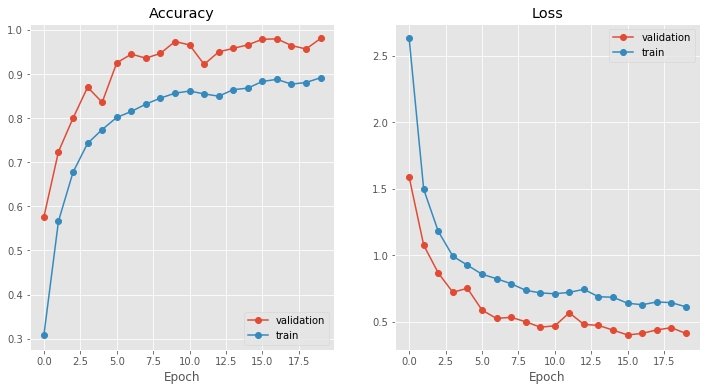

In [13]:
plot_metrics(history.history)

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.9853 - accuracy: 0.7932


In [15]:
print("Accuracy = %.2f, loss = %.2f"%(test_acc, test_loss))

Accuracy = 0.79, loss = 0.99


## Podejście naiwne wnioski

Z wykresów widać, że model fajnie trenuję się, jednak wynik na zbiorze nie jest dobry oraz dokładność na zbiorze walidacyjnym jest wyższa niż na zbiorze trenjingowym (przez warstwy Dropout). To świadczy o tym że zwykły model nie może wychwycić różnicę między takimi znakami jak np. `U, V, W` oraz dlatego ulega przetrenowaniu. 

## Sieci konwolucyjne

Spróbujemy zbudowac prostą sieć konwolucyjną, żeby porównać wyniki z prostą siećią NN. Jednak na początek przeskalujemy dane do formy której spodziewa się warstwa Conv2D

In [16]:
x_train = np.expand_dims(x_train.reshape(len(x_train), 28, 28), axis = 3)
x_test = np.expand_dims(x_test.reshape(len(x_test), 28, 28), axis = 3)

In [17]:
input_shape=(28,28,1)

## Model
Wykorzystamy jedną warstwę Conv2D oraz MaxPooling2D

In [18]:
model = Sequential([
    Conv2D(32, (3,3), padding="same", activation="relu", input_shape=input_shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(output_shape, activation="softmax")
])

model.summary()

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                3225      
Total params: 806,489
Trainable params: 806,489
Non-trainable params: 0
________________________________________________

In [19]:
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_split=0.2, shuffle=True)

Epoch 1/20
687/687 [==============================] - 17s 24ms/step - loss: 1.6884 - accuracy: 0.4992 - val_loss: 0.5766 - val_accuracy: 0.8763
Epoch 2/20
687/687 [==============================] - 17s 25ms/step - loss: 0.5113 - accuracy: 0.8424 - val_loss: 0.1765 - val_accuracy: 0.9689
Epoch 3/20
687/687 [==============================] - 13s 19ms/step - loss: 0.2590 - accuracy: 0.9230 - val_loss: 0.0672 - val_accuracy: 0.9936
Epoch 4/20
687/687 [==============================] - 14s 20ms/step - loss: 0.1545 - accuracy: 0.9551 - val_loss: 0.0310 - val_accuracy: 0.9985
Epoch 5/20
687/687 [==============================] - 13s 19ms/step - loss: 0.1098 - accuracy: 0.9679 - val_loss: 0.0166 - val_accuracy: 0.9998
Epoch 6/20
687/687 [==============================] - 13s 19ms/step - loss: 0.0847 - accuracy: 0.9756 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 7/20
687/687 [==============================] - 14s 20ms/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.0062 - val_accuracy:

## Metryki

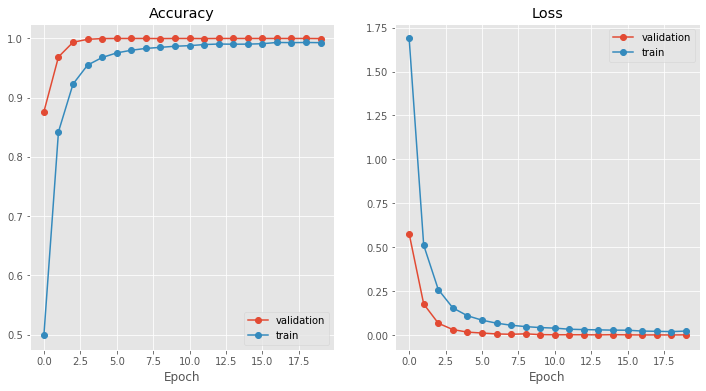

In [20]:
plot_metrics(history.history)

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy = %.2f, loss = %.2f"%(test_acc, test_loss))

225/225 [==============================] - 2s 7ms/step - loss: 0.8981 - accuracy: 0.8431
Accuracy = 0.84, loss = 0.90


## Wniosek 

Jak widać nawet prosta sieć kowolucyjna daję lepsze wyniki niż sieć zwykła sieć gęsta, przecież też ulega przetrenowaniu.

## Sieci konwolucyjne - głębsza sieć

In [22]:
# filters = 32
# kernel_size = (3, 3)
# pooling_size = (2, 2)
# padding="same" #"valid" "same"
# initializer='he_normal'
# activation = "relu"
# dropout = 0.35

# regularizer = regularizers.l2
# coef = 0.001

# loss = "categorical_crossentropy"
# optimizer = "adam"


# model = keras.models.Sequential([
#     InputLayer(input_shape),
#     Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
#     BatchNormalization(),
#     Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
#     BatchNormalization(),
#     MaxPooling2D(pooling_size),
#     Dropout(dropout),
    
#     Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
#     BatchNormalization(),
#     Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
#     BatchNormalization(),
#     MaxPooling2D(pooling_size),
#     Dropout(dropout),
    
#     Flatten(),
#     Dense(256, activation = 'relu'),
#     Dropout(dropout),
#     Dense(output_shape, activation="softmax")
# ])

# model.summary()

# model.compile(optimizer=optimizer,
#                    loss = loss,
#                    metrics = ['accuracy'])

filters = 64
kernel_size = (3, 3)
pooling_size = (2, 2)
padding="same" #"valid" "same"
initializer='he_normal'
activation = "relu"
dropout = 0.35

regularizer = regularizers.l2
coef = 0.001

loss = "categorical_crossentropy"
optimizer = "adam"


model = keras.models.Sequential([
    InputLayer(input_shape),
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    MaxPooling2D(pooling_size),
    Dropout(dropout),
    
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    MaxPooling2D(pooling_size),
    Dropout(dropout),
    
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    Conv2D(filters, kernel_size, padding=padding, kernel_regularizer=regularizer(coef), kernel_initializer=initializer, activation=activation),
    BatchNormalization(),
    MaxPooling2D(pooling_size),
    Dropout(dropout),
    
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(dropout),
    Dense(output_shape, activation="softmax")
])

model.summary()

model.compile(optimizer=optimizer,
                   loss = loss,
                   metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [23]:
batch_size = 256
epochs = 10
validation_split = 0.2

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/10
86/86 [==============================] - 159s 2s/step - loss: 3.2262 - accuracy: 0.2866 - val_loss: 3.6912 - val_accuracy: 0.1774
Epoch 2/10
86/86 [==============================] - 161s 2s/step - loss: 1.4008 - accuracy: 0.7631 - val_loss: 2.3393 - val_accuracy: 0.4786
Epoch 3/10
86/86 [==============================] - 174s 2s/step - loss: 0.9488 - accuracy: 0.9124 - val_loss: 1.1427 - val_accuracy: 0.8443
Epoch 4/10
86/86 [==============================] - 152s 2s/step - loss: 0.7705 - accuracy: 0.9584 - val_loss: 0.7458 - val_accuracy: 0.9676
Epoch 5/10
86/86 [==============================] - 154s 2s/step - loss: 0.6743 - accuracy: 0.9789 - val_loss: 0.6139 - val_accuracy: 0.9945
Epoch 6/10
86/86 [==============================] - 154s 2s/step - loss: 0.6102 - accuracy: 0.9853 - val_loss: 0.5460 - val_accuracy: 0.9998
Epoch 7/10
86/86 [==============================] - 160s 2s/step - loss: 0.5558 - accuracy: 0.9874 - val_loss: 0.5027 - val_accuracy: 0.9996
Epoch 8/10
86

## Metryki

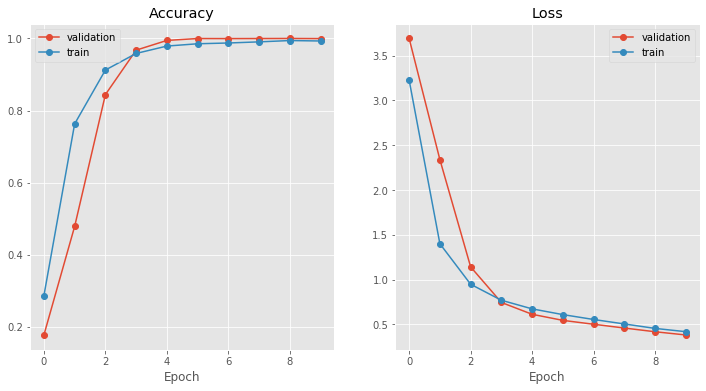

In [34]:
plot_metrics(history.history)

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy = %.2f, loss = %.2f"%(test_acc, test_loss))

225/225 [==============================] - 12s 51ms/step - loss: 0.4393 - accuracy: 0.9847
Accuracy = 0.98, loss = 0.44


## Predykcja

In [26]:
predictions = model.predict(x_test)

In [27]:
def max_idx(l):
    _max = 0
    for i in range(1, len(l)):
        if (l[i] > l[_max]):
            _max = i
    return _max

def bad_predicted(pred, labels, n = 10):
    ret = []
    counter = 0
    for elem in range(pred.shape[0]):
        i = max_idx(pred[elem])
        if (labels[elem][i] != 1):
            ret.append(elem)
            counter += 1
            if (counter == n):
                break
    return ret

def good_predicted(pred, labels, n = 10):
    ret = []
    counter = 0
    for elem in range(pred.shape[0]):
        i = max_idx(pred[elem])
        if (labels[elem][i] == 1):
            ret.append(elem)
            counter += 1
            if (counter == n):
                break
    return ret

Nieprawidlowo zaklasyfikowane

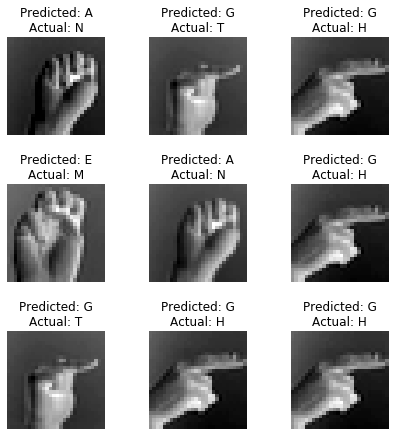

In [28]:
n_rows = 3
n_cols = 3

bad = bad_predicted(predictions, y_test, n_rows * n_cols)

plt.figure(figsize=(n_cols * 2.4, n_rows * 2.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        if (index < len(bad)):
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_test[bad[index]].reshape((28, 28)), cmap="binary", interpolation="nearest")
            plt.axis('off')
            predicted = chr(ord("A") + max_idx(predictions[bad[index]]))
            actual = chr(ord("A") + max_idx(y_test[bad[index]]))
            plt.title("Predicted: " + predicted + "\nActual: " + actual, fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Prawidlowo zaklasyfikowane (żeby upewnić się że wyniki są dobre)

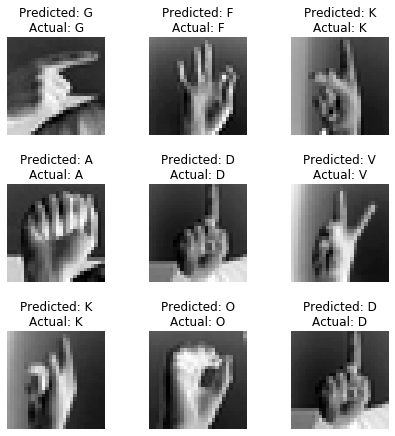

In [29]:
n_rows = 3
n_cols = 3

good = good_predicted(predictions, y_test, n_rows * n_cols)

plt.figure(figsize=(n_cols * 2.4, n_rows * 2.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        if (index < len(bad)):
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_test[good[index]].reshape((28, 28)), cmap="binary", interpolation="nearest")
            plt.axis('off')
            predicted = chr(ord("A") + max_idx(predictions[good[index]]))
            actual = chr(ord("A") + max_idx(y_test[good[index]]))
            plt.title("Predicted: " + predicted + "\nActual: " + actual, fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Wnioski 

Jak widać głębsza sieć konwolucyjna daje dobre wyniki, znaczno lepsze niż zwykłe sieci NN w tego typu zagadnieniach. Jeżli zobaczyć nieprawidlowe klasyfikacje, to można dojść do wniosku, że czlowiek nie zmógłby ich prawidlowo zaklasyfikować, bo większość błędów przychodzi się na podobne litery.

In [30]:
#zapisanie modelu dla ponownego użycia
!mkdir -p model
model.save("model/model.h5")

In [31]:
model = keras.models.load_model("model/model.h5")

In [32]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 11s 50ms/step - loss: 0.4393 - accuracy: 0.9847


[0.4393070340156555, 0.9846625924110413]

## Wykorzystanie modelu

Również stworzyłem skrypt `detection.py`, który pozwala na klasyfikacje pokazywanych znaków napszykład z kamery laptopa. Dla stworzenia skryptu wykorzystałem bibliotekę OpenCV oraz model który był wytrzenerowany powyżej i zapisany do pliku `model.h5`    
Skrypt zakłada, że kamera jest statyczna oraz że ręka jest najwięszym objektem który zmienia się. Niektóre wartości dla odzielinia ręki od tła były zmieniane w załeżności jakie jest tło oraz jasności/kierunku światła.    
Model pozwala na rozpoznawanie większości znaków. Udało by uzyskać lepsze wyniki gdyby mieliśmy wiekszą ilość danych do trenowania (np. różne kolory tla, rozmiary ręki..) oraz polepszyć algorytm zlokalizowania ręki.   

Kilka przykładów:

![b](./img/b.png)
![i](./img/i.png)
![r](./img/r.png)